In [2]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [4]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [5]:
df.groupby(df['Day'].dt.year).t.mean().idxmax()
df.groupby(df['Day'].dt.year).t.mean().idxmin()

2012

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [6]:
df[(df['Day'].dt.month == 1) & (df['t']>=0)].groupby(df['Day'].dt.year).t.count().idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [7]:
df[(df['Day'].dt.month >= 6) & (df['Day'].dt.month <= 8)].groupby(df['Day'].dt.year).t.mean().idxmin()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [8]:
import numpy as np
k = df.sort_values(by='Day')
k.t = np.abs(df.t.shift(-1)-df.t)
k[k['t'] == k['t'].max()]['Day']

2334   2014-05-26
Name: Day, dtype: datetime64[ns]

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

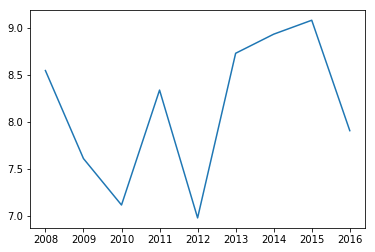

In [9]:
df.groupby(df['Day'].dt.year).t.mean()
plt.plot(df.Day.dt.year.unique(), df.groupby(df['Day'].dt.year).t.mean().tolist())